In [39]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [40]:
data=pd.read_csv('SH600000.csv')

In [41]:
data.head()

,Time,Open,High,Low,Close,Volume
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100


In [42]:
variables=pd.read_csv('SH600000-feature.csv')

In [43]:
variables.rename(columns={'Unnamed: 0':'Time'},inplace=True)

In [44]:
variables.head()

,Time,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag
0,Day17,17860600,57.161421,0.493500,0.628701,-0.600043,132603900,160.05570,159.320207,0.233345,1.716987,0.058217
1,Day18,30809600,43.371027,0.000000,0.324672,-1.000000,101794300,159.23984,159.202773,-3.690899,-2.282088,-2.833712
2,Day19,14531400,42.452003,0.031911,0.175137,-0.700032,87262900,157.97898,158.937000,-4.745577,-3.195824,-0.239781
3,Day20,8483500,39.311722,0.009433,0.013781,-0.894749,78779400,156.18038,158.510527,-3.785677,-4.287377,-0.843920
4,Day21,22525800,34.588465,0.110347,0.050564,-0.272718,56253600,154.53014,157.904820,-5.238613,-5.128181,-1.463404


In [45]:
data=data.merge(variables,on='Time',how='left')

### variable creation

#### 1. MACD

In [46]:
data['EMA-12']=np.array(0)

In [47]:
## 12day EMA
N=12.0
coeff=2.0/(N+1)
data.loc[0,'EMA-12'] = data.loc[0,'Close']
for i in range(1,len(data)):
    data.loc[i,'EMA-12'] = (data.loc[i-1,'EMA-12']*(1-coeff))+ (data.loc[i,'Close']*coeff)

In [48]:
data['EMA-26']=np.array(0)
## 26day EMA
N=26.0
coeff=2.0/(N+1)
data.loc[0,'EMA-26'] = data.loc[0,'Close']
for i in range(1,len(data)):
    data.loc[i,'EMA-26'] = (data.loc[i-1,'EMA-26']*(1-coeff))+ (data.loc[i,'Close']*coeff)

In [49]:
##DIF
data['DIF'] = data['EMA-12']-data['EMA-26']

In [50]:
## MACD
N=9
coeff=2.0/(N+1)
data['MACD']=np.array(0)
data.loc[0,'MACD'] = 0
for i in range(2,len(data)):
    data.loc[i,'MACD']= (data.loc[i-1,'MACD']*(1-coeff))+ (data.loc[i,'DIF']*coeff)

In [51]:
data.head()

,Time,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,...,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,EMA-12,EMA-26,DIF,MACD
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,156.959200,156.959200,0.000000,0.000000
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,156.902138,156.931726,-0.029587,0.000000
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,157.139133,157.043643,0.095490,0.019098
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,157.510820,157.229676,0.281143,0.071507
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,157.896632,157.436263,0.460369,0.149279


In [52]:
data.drop(['EMA-12','EMA-26','DIF'],axis=1,inplace=True)

#### 2. 3-Day Return & MA3 

In [53]:
## 3-Day Return
price = data["Close"]
day3Return = np.zeros(len(data))
for i in range(14,len(data)):
    day3Return[i] = 100*(price[i]-price[i-2])/price[i-2] 

In [54]:
day3Returnlag = np.append(np.array([0]),day3Return[0:len(day3Return)-1])
data['day3Returnlag']=day3Returnlag

In [55]:
## MA3
MA3 = np.zeros(len(data))
for i in range(14,len(data)):
    MA3[i] = data.loc[i-2:i+1,'Close'].sum()/3

In [56]:
MA3lag = np.append(np.array([0]),MA3[0:len(MA3)-1])
data['MA3lag']=MA3lag

In [57]:
data.head()

,Time,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,MACD,day3Returnlag,MA3lag
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.0
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.0
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019098,0.0,0.0
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071507,0.0,0.0
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149279,0.0,0.0


#### 4. Open,High,Low,Close lag

In [58]:
Openlag = np.append(np.array([0]),data['Open'][0:len(data)-1])
data['Openlag']=Openlag

In [59]:
Highlag = np.append(np.array([0]),data['High'][0:len(data)-1])
data['Highlag']=Highlag

In [60]:
Lowlag = np.append(np.array([0]),data['Low'][0:len(data)-1])
data['Lowlag']=Lowlag

In [61]:
Closelag = np.append(np.array([0]),data['Close'][0:len(data)-1])
data['Closelag']=Closelag

## Keep label y=Close and drop others

In [62]:
data.drop(['Open','High','Low','Volume'],axis=1,inplace=True)

In [63]:
data=data.iloc[16:,:]

In [64]:
data.head()

,Time,Close,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,MACD,day3Returnlag,MA3lag,Openlag,Highlag,Lowlag,Closelag
16,Day17,154.8268,17860600.0,57.161421,0.493500,0.628701,-0.600043,132603900.0,160.05570,159.320207,0.233345,1.716987,0.058217,0.601010,-1.772484,211.812967,159.1842,161.5020,158.7207,159.2769
17,Day18,154.4560,30809600.0,43.371027,0.000000,0.324672,-1.000000,101794300.0,159.23984,159.202773,-3.690899,-2.282088,-2.833712,0.470475,-2.737332,209.247967,158.8134,158.8134,154.8268,154.8268
18,Day19,153.1580,14531400.0,42.452003,0.031911,0.175137,-0.700032,87262900.0,157.97898,158.937000,-4.745577,-3.195824,-0.239781,0.288494,-3.026741,207.239233,154.8268,156.0321,154.1779,154.4560
19,Day20,150.9330,8483500.0,39.311722,0.009433,0.013781,-0.894749,78779400.0,156.18038,158.510527,-3.785677,-4.287377,-0.843920,0.047651,-1.077850,204.457933,154.3633,154.8268,153.0653,153.1580
20,Day21,151.3038,22525800.0,34.588465,0.110347,0.050564,-0.272718,56253600.0,154.53014,157.904820,-5.238613,-5.128181,-1.463404,-0.211652,-2.280908,203.283600,153.1580,153.5289,149.4496,150.9330


In [65]:
data[data['Time'] =='Day504']

,Time,Close,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,MACD,day3Returnlag,MA3lag,Openlag,Highlag,Lowlag,Closelag
503,Day504,133.2632,12448791.0,48.829347,0.447764,0.492539,-0.684184,1.503734e+09,133.43596,132.621573,-1.559588,0.845921,0.093246,0.544583,-0.923347,177.190733,134.3737,134.3737,132.0293,132.3995


## Train, Test &OOT

In [66]:
tt=data.iloc[:404,:].copy()
oot=data.iloc[404:504,:].copy()

In [67]:
tt_time=tt['Time']
oot_time=oot['Time']
tt_y=tt['Close']
oot_y=oot['Close']

In [68]:
tt.drop(['Time','Close'],inplace=True,axis=1)
oot.drop(['Time','Close'],inplace=True,axis=1)

In [69]:
for key in tt.keys():
    ss = StandardScaler()
    tt[key] = ss.fit_transform(tt[key].values.reshape(-1, 1))

In [70]:
for key in oot.keys():
    oot[key] = ss.transform(oot[key].values.reshape(-1, 1))

In [71]:
tt['Time']=tt_time
oot['Time']=oot_time
tt['Close']=tt_y
oot['Close']=oot_y

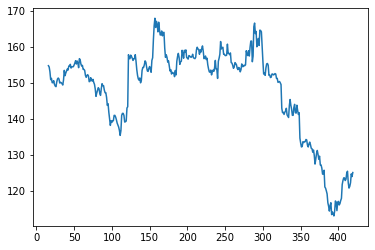

In [79]:
plt.plot(tt['Close'])
# plt.yscale('log')
plt.show()

In [72]:
tt.to_csv('SH600000_tt.csv')
oot.to_csv('SH600000_oot.csv')